<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Numerical Differentiation Problem Statement**

A **numerical grid** consists of evenly spaced points over a given interval in the domain of a function. The **spacing or step size** ($h$) is the distance between adjacent points in this grid. If $x$ represents a numerical grid, then $x_j$ is the $j^{th}$ point, with spacing $h$ between $x_{j-1}$ and $x_j$.

### **Numerical Grids in Python**
Python provides functions to generate numerical grids. In one-dimensional cases, the `linspace` function is commonly used to create evenly spaced arrays.

A function $f(x)$ in Python can be represented over an interval by computing values on a grid. Even if $f(x)$ is continuous, we often use a **discrete or discretized** representation, which is useful for numerical computations.

### **Applications of Discretized Data**
Discrete data representations are essential in engineering and science. For example, a **temperature sensor** records temperature at specific time intervals. Although the actual temperature is a continuous function of time, sensors provide only discrete values, meaning the underlying function remains unknown.

### **Goal of Numerical Differentiation**
Whether $f$ is an analytic function or a discrete representation, numerical differentiation aims to **approximate the derivative of $f$** over a numerical grid while ensuring accuracy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define function f(x) and its derivative f'(x)
def f(x):
    return np.sin(x)  # Example function: sin(x)

def f_derivative(x):
    return np.cos(x)  # Analytical derivative of sin(x)

# Generate a numerical grid
x = np.linspace(0, 2*np.pi, 100)  # 100 points between 0 and 2π
h = x[1] - x[0]  # Step size

# Forward Difference Method
forward_diff = (f(x[1:]) - f(x[:-1])) / h  # Forward difference approximation
x_fd = x[:-1]  # Adjusted x values for plotting

# Central Difference Method
central_diff = (f(x[2:]) - f(x[:-2])) / (2*h)  # Central difference approximation
x_cd = x[1:-1]  # Adjusted x values for plotting

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(x, f_derivative(x), label="True Derivative (cos(x))", linewidth=2)
plt.plot(x_fd, forward_diff, '--', label="Forward Difference Approximation")
plt.plot(x_cd, central_diff, '--', label="Central Difference Approximation")
plt.legend()
plt.xlabel("x")
plt.ylabel("Derivative")
plt.title("Numerical Differentiation using Finite Differences")
plt.grid()
plt.show()

# **Finite Difference Approximating Derivatives**

The derivative **$f'(x)$** of a function **$f(x)$** at the point **$x = a$** is defined as:

$$
f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x - a}
$$

The derivative at **$x = a$** represents the slope at this point. In finite difference approximations, function values near **$x = a$** are used to estimate the derivative. Three common finite difference formulas are:

## **Forward Difference**
Estimates the slope using points **$(x_j, f(x_j))$** and **$(x_{j+1}, f(x_{j+1}))$**:

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{x_{j+1} - x_j}
$$

## **Backward Difference**
Estimates the slope using points **$(x_{j-1}, f(x_{j-1}))$** and **$(x_j, f(x_j))$**:

$$
f'(x_j) = \frac{f(x_j) - f(x_{j-1})}{x_j - x_{j-1}}
$$

## **Central Difference**
Estimates the slope using points **$(x_{j-1}, f(x_{j-1}))$** and **$(x_{j+1}, f(x_{j+1}))$**:

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_{j-1})}{x_{j+1} - x_{j-1}}
$$

# **Finite Difference Approximations Using Taylor Series**

To derive an approximation for the derivative of **$f$**, we use the **Taylor series** expansion around **$x_j$**:

$$
f(x) = f(x_j) + f'(x_j)(x - x_j) + \frac{f''(x_j)(x - x_j)^2}{2!} + \frac{f'''(x_j)(x - x_j)^3}{3!} + \dots
$$

For a grid with spacing **$h$**, we compute the Taylor series at **$x_{j+1}$**:

$$
f(x_{j+1}) = f(x_j) + f'(x_j)h + \frac{f''(x_j)h^2}{2!} + \frac{f'''(x_j)h^3}{3!} + \dots
$$

Solving for **$f'(x_j)$**:

$$
f'(x_j) = \frac{f(x_{j+1}) - f(x_j)}{h} - \frac{f''(x_j)h}{2!} - \frac{f'''(x_j)h^2}{3!} - \dots
$$

The higher-order terms can be rewritten as:

$$
-\frac{f''(x_j)h}{2!} - \frac{f'''(x_j)h^2}{3!} - \dots = O(h)
$$

Thus, the **forward difference formula** is:

$$
f'(x_j) \approx \frac{f(x_{j+1}) - f(x_j)}{h}, \quad O(h)
$$

Similarly, for the **backward difference**:

$$
f'(x_j) \approx \frac{f(x_j) - f(x_{j-1})}{h}, \quad O(h)
$$

For the **central difference**, subtracting Taylor series expansions at **$x_{j+1}$** and **$x_{j-1}$** gives:

$$
f'(x_j) \approx \frac{f(x_{j+1}) - f(x_{j-1})}{2h}, \quad O(h^2)
$$

# **Higher Order Approximation**

To improve accuracy, compute **Taylor series** at four points: **$x_{j-2}$, $x_{j-1}$, $x_{j+1}$, and $x_{j+2}$**:

$$
f(x_{j-2}) = f(x_j) - 2h f'(x_j) + \frac{4h^2 f''(x_j)}{2} - \frac{8h^3 f'''(x_j)}{6} + O(h^4)
$$

$$
f(x_{j-1}) = f(x_j) - h f'(x_j) + \frac{h^2 f''(x_j)}{2} - \frac{h^3 f'''(x_j)}{6} + O(h^4)
$$

$$
f(x_{j+1}) = f(x_j) + h f'(x_j) + \frac{h^2 f''(x_j)}{2} + \frac{h^3 f'''(x_j)}{6} + O(h^4)
$$

$$
f(x_{j+2}) = f(x_j) + 2h f'(x_j) + \frac{4h^2 f''(x_j)}{2} + \frac{8h^3 f'''(x_j)}{6} + O(h^4)
$$

To cancel **$h^2, h^3, h^4$** terms:

$$
f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j+1}) - f(x_{j+2}) = 12h f'(x_j) + O(h^5)
$$

Solving for **$f'(x_j)$**:

$$
f'(x_j) \approx \frac{f(x_{j-2}) - 8f(x_{j-1}) + 8f(x_{j+1}) - f(x_{j+2})}{12h}, \quad O(h^4)
$$

This **higher-order scheme** provides better accuracy than the **central difference formula** but requires more calculations.

In [ ]:
# Numerical Approximation of Derivatives
import numpy as np
import matplotlib.pyplot as plt

# Step size
h = 0.1
x = np.arange(0, 2*np.pi, h)
y = np.cos(x)

# Forward difference
forward_diff = np.diff(y) / h
x_diff = x[:-1]
exact_solution = -np.sin(x_diff)

# Plot results
plt.figure(figsize=(12, 8))
plt.plot(x_diff, forward_diff, '--', label='Finite Difference Approximation')
plt.plot(x_diff, exact_solution, label='Exact Solution')
plt.legend()
plt.show()

# Compute max error
max_error = max(abs(exact_solution - forward_diff))
print(max_error)


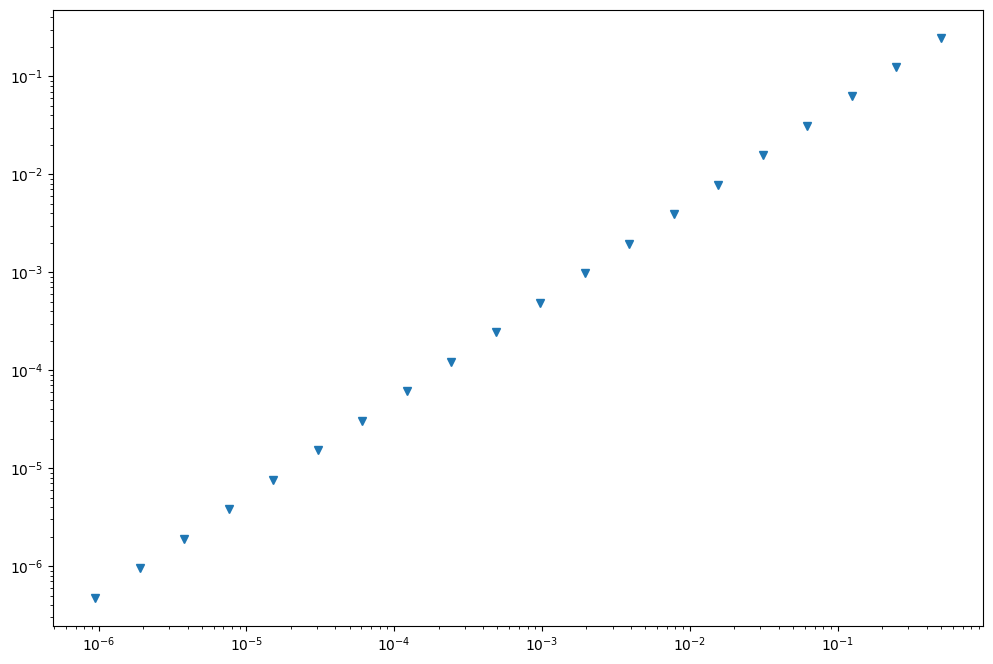

In [2]:
# Error Analysis
import numpy as np
import matplotlib.pyplot as plt

h = 1
iterations = 20
step_size = []
max_error = []

for i in range(iterations):
    h /= 2
    step_size.append(h)

    x = np.arange(0, 2*np.pi, h)
    y = np.cos(x)

    forward_diff = np.diff(y) / h
    x_diff = x[:-1]
    exact_solution = -np.sin(x_diff)

    max_error.append(max(abs(exact_solution - forward_diff)))

# Log-log plot of error vs step size
plt.figure(figsize=(12, 8))
plt.loglog(step_size, max_error, 'v')
plt.show()


# **Approximating Higher-Order Derivatives**

It is possible to use **Taylor series** to approximate higher-order derivatives (e.g., $f''(x_j)$, $f'''(x_j)$, etc.). For example, taking the **Taylor series** around $a = x_j$ and then computing it at $x = x_{j-1}$ and $x_{j+1}$ gives:

$$
f(x_{j-1}) = f(x_j) - h f'(x_j) + \frac{h^2 f''(x_j)}{2} - \frac{h^3 f'''(x_j)}{6} + \dots
$$

and

$$
f(x_{j+1}) = f(x_j) + h f'(x_j) + \frac{h^2 f''(x_j)}{2} + \frac{h^3 f'''(x_j)}{6} + \dots
$$

By **adding** these two equations together, we get:

$$
f(x_{j-1}) + f(x_{j+1}) = 2f(x_j) + h^2 f''(x_j) + \frac{h^4 f''''(x_j)}{24} + \dots
$$

With some rearrangement, this gives the approximation:

$$
f''(x_j) \approx \frac{f(x_{j+1}) - 2f(x_j) + f(x_{j-1})}{h^2}, \quad \text{and is } O(h^2).
$$


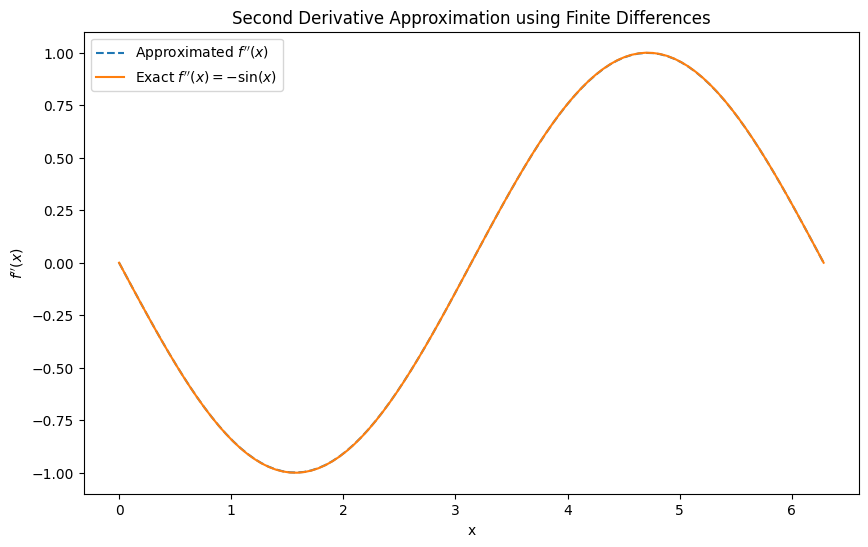

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its second derivative
def f(x):
    return np.sin(x)  # Example function

def second_derivative_approx(x, h):
    return (f(x + h) - 2 * f(x) + f(x - h)) / h**2

# Define grid points
x_values = np.linspace(0, 2 * np.pi, 100)
h = 0.1  # Step size
approx_second_derivative = second_derivative_approx(x_values, h)

# Exact second derivative of sin(x) is -sin(x)
exact_second_derivative = -np.sin(x_values)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x_values, approx_second_derivative, '--', label='Approximated $f\'\'(x)$')
plt.plot(x_values, exact_second_derivative, label='Exact $f\'\'(x) = -\sin(x)$')
plt.xlabel('x')
plt.ylabel('$f\'\'(x)$')
plt.legend()
plt.title('Second Derivative Approximation using Finite Differences')
plt.show()